In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#importing training data
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train['Cabin'].nunique()

147

In [6]:
#dropping unnecessary columns of training data
train.drop(['PassengerId','Name', 'Cabin', 'Ticket', 'Age'], axis = 1)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


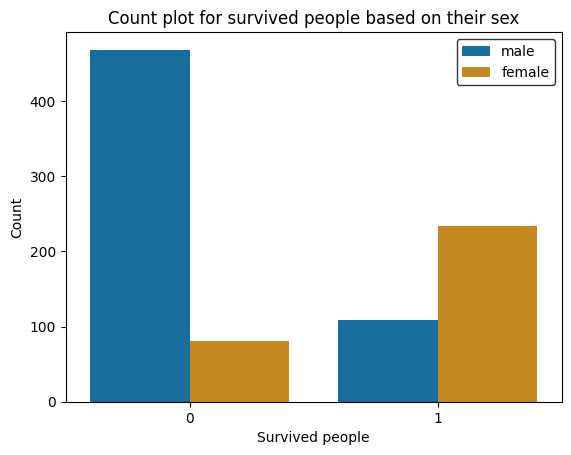

In [7]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex', palette = 'colorblind')
plt.legend(edgecolor = 'black')
plt.title('Count plot for survived people based on their sex')
plt.xlabel('Survived people')
plt.ylabel('Count')
plt.show()

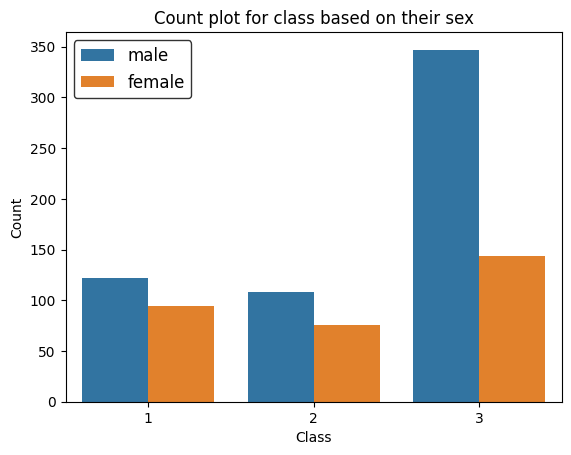

In [8]:
sns.countplot(x = 'Pclass', data = train, hue = 'Sex')
plt.legend(fontsize = 'large', edgecolor = 'black')
plt.title('Count plot for class based on their sex')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [9]:
le = LabelEncoder()

In [10]:
train['Sex'] = le.fit_transform(train['Sex'])

In [11]:
x_train = train[['Pclass','Sex','Fare']]
y_train = train['Survived']

In [12]:
y_train.shape

(891,)

In [13]:
test = pd.read_csv('test.csv')

In [14]:
test.shape

(418, 11)

In [15]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
test.dropna(subset = ['Fare'], inplace = True)

In [18]:
test['Sex'] = le.fit_transform(test['Sex'])

In [19]:
x_test = test[['Pclass','Sex','Fare']]

In [20]:
x_test.head()

,Pclass,Sex,Fare
0,3,1,7.8292
1,3,0,7.0000
2,2,1,9.6875
3,3,1,8.6625
4,3,0,12.2875


In [21]:
log = LogisticRegression()

In [22]:
log.fit(x_train, y_train)

LogisticRegression()

In [23]:
test['Survived'] = log.predict(x_test)

In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,1


In [25]:
def replace(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'

In [26]:
test['Sex'] = test['Sex'].apply(replace)

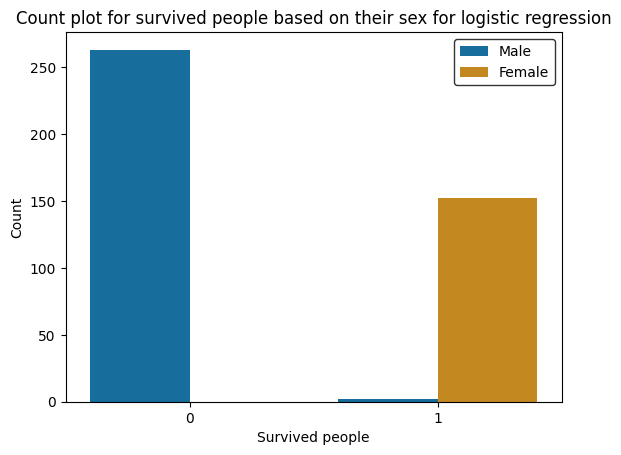

In [27]:
sns.countplot(x = 'Survived', data = test, hue = 'Sex', palette = 'colorblind')
plt.legend(edgecolor = 'black')
plt.title('Count plot for survived people based on their sex for logistic regression')
plt.xlabel('Survived people')
plt.ylabel('Count')
plt.show()

In [28]:
rfc = RandomForestClassifier()

In [29]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
test['new_Survived'] = rfc.predict(x_test)

In [31]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,new_Survived
0,892,3,"Kelly, Mr. James",Male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",Female,47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",Male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",Male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Female,22.0,1,1,3101298,12.2875,NaN,S,1,1


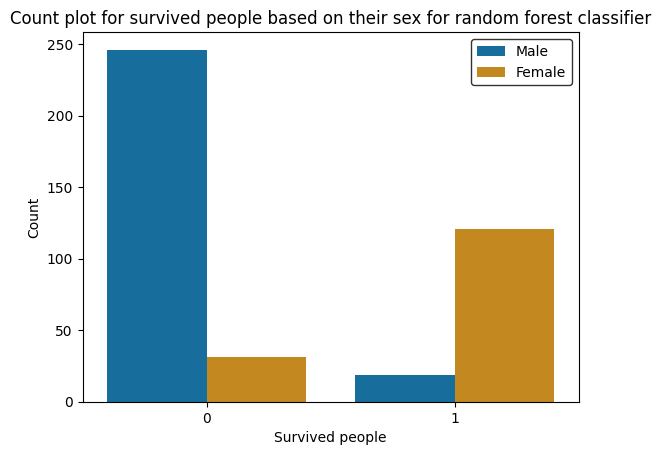

In [32]:
sns.countplot(x = 'new_Survived', data = test, hue = 'Sex', palette = 'colorblind')
plt.legend(edgecolor = 'black')
plt.title('Count plot for survived people based on their sex for random forest classifier')
plt.xlabel('Survived people')
plt.ylabel('Count')
plt.show()